<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Advance_Regression/02-07-03-survival-analysis-landmark-analysis-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 4. Landmark Analysis

## Introduction

**Landmark analysis** is a method that involves selecting a time point during a follow-up period and only analyzing subjects who have survived until that time. It's used to avoid survival bias, or immortal time bias, which can occur when time-dependent events are incorrectly analyzed

***Key Concepts of Landmark Analysis***:

Here are some key points about landmark analysis:

**Landmark time**: A fixed time point after baseline is selected as the landmark time. This is usually a time when the covariate of interest is known for most patients.

**Analysis cohort**: Only subjects who are still at risk for the event at the landmark time are included in the analysis. Subjects who were censored or experienced the event before the landmark are excluded.

**Response categories**: Patients are separated into response categories based on whether they responded to treatment by the landmark time.

**Sensitivity analyses**: Different landmark times can be used to perform sensitivity analyses.

**Patient comparisons**: Patient characteristics can be compared between those included and excluded in the analysis.

**Event comparisons**: Events can be compared between groups before the landmark time.

***Why Use Landmark Analysis***?

1.  **Avoiding Time-Dependent Bias**:
    -   If you simply treat a time-dependent covariate as a baseline covariate (e.g., using the value of a variable at the start of the study), it may lead to biased results because the covariate changes over time and may only be relevant after a certain point.
    -   Landmark analysis avoids this bias by focusing on a well-defined group of patients at a specific time point.
2.  **Handling Intermediate Events**:
    -   It is often used in medical research where intermediate events, such as the progression of disease or initiation of treatment, may occur after the start of the study but before the event of interest (e.g., death).
    -   The technique helps assess how these intermediate events influence survival outcomes.

***Example of Landmark Analysis***:

Let’s consider a clinical trial where the goal is to study the effect of a treatment on the survival of cancer patients. Some patients receive treatment at different times after diagnosis. To assess the effect of receiving the treatment, we can use landmark analysis by selecting a specific landmark time (e.g., 6 months after diagnosis) and then comparing survival outcomes for patients who are still alive at that point, stratifying them by whether they received the treatment before or after the landmark time.

***Steps in Landmark Analysis***:

1.  **Define a Landmark Time**:
    -   Select a time point (e.g., 6 months, 1 year) that is clinically meaningful or based on the study design.
2.  **Create a Subset of Data**:
    -   Restrict the analysis to individuals who are still alive and event-free at the landmark time. This eliminates individuals who died or experienced the event before the landmark.
3.  **Fix the Covariates**:
    -   For each individual, the values of time-dependent covariates are fixed at the landmark time. This allows us to analyze how these covariates, measured at the landmark, are related to subsequent survival.
4.  **Perform Survival Analysis**:
    -   Perform standard survival analysis (e.g., Kaplan-Meier estimation, Cox regression) starting from the landmark time onward, using the fixed covariates as predictors.

***Illustration of Landmark Analysis***:

In medical studies, patients often undergo treatments at varying times. For example, some cancer patients may receive a second-line therapy after disease progression. If the analysis were to include all patients from the start of the study without considering the timing of the therapy, it could lead to misleading conclusions, because the treatment may be administered only to patients who survive long enough to receive it. Landmark analysis solves this issue by focusing on patients who survive past a specific time point.

***Advantages of Landmark Analysis***:

1.  **Reduces Bias**:
    -   It reduces the bias associated with time-dependent covariates by focusing only on patients who are still at risk at a specific time point.
2.  **Simple to Implement**:
    -   It is straightforward to implement using traditional survival analysis methods (like Kaplan-Meier or Cox regression) after defining the landmark time.
3.  **Handles Time-Dependent Covariates**:
    -   Landmark analysis can account for covariates that change over time or covariates that only become relevant after a certain period.

***Limitations***:

1.  **Loss of Information**:
    -   By focusing only on patients who survive past the landmark time, the analysis excludes individuals who experienced the event earlier, potentially losing valuable information.
2.  **Arbitrary Landmark Time**:
    -   Choosing an appropriate landmark time can be subjective, and different landmark times may lead to different results.
3.  **Bias at the Landmark**:
    -   Patients included in the analysis at the landmark time may not represent the overall population, as only those who survived until the landmark time are considered. This could introduce a selection bias.









## Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314975 sha256=4203d5d85188f7c9819f8a9cd79cf4c4ce592f15850b8798f313a580c7198f17
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Required R Packages



In [3]:
%%R
packages <-c(
		 'tidyverse',
		 'report',
		 'performance',
		 'gtsummary',
		 'MASS',
		 'epiDisplay',
		 'survival',
		 'survminer',
		 'ggsurvfit',
		 'tidycmprsk',
		 'ggfortify',
		 'timereg',
		 'cmprsk',
		 'condsurv',
		 'riskRegression'
		 )

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

In [4]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method                    from     
  global_pvalue_fun.tidycrr gtsummary

  method       from      
  print.lrtest epiDisplay



     tidyverse         report    performance      gtsummary           MASS 
          TRUE           TRUE           TRUE           TRUE           TRUE 
    epiDisplay       survival      survminer      ggsurvfit     tidycmprsk 
          TRUE           TRUE           TRUE           TRUE           TRUE 
     ggfortify        timereg         cmprsk       condsurv riskRegression 
          TRUE           TRUE           TRUE           TRUE           TRUE 


## Load R packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packages


## Landmark Analysis in R

This tutorial is mostly used two R packages [{survival}](https://cran.r-project.org/web/packages/survival/index.html) and [{ggsurvfit}](https://www.danieldsjoberg.com/ggsurvfit/). Additionally we will use [{ggfortify}](https://github.com/sinhrks/ggfortify) which offers `fortify` and `autoplot` functions to allow automatic ggplot2 to visualize Kaplan-Meier plots.



## Data

In this example, we will perform a Landmark analysis using the `veteran` dataset from the {survival} package. In this case, we will explore how the `Karnofsky performance score (karno)`,  and `treatment type (trt)` influence survival, restricting the analysis to patients who have survived up to a pre-specified landmark time (e.g., 90 days). The idea is to assess how these covariates affect survival after the landmark time, considering only the individuals who are still alive at that time.


In [ ]:
%%R
data(veteran)
glimpse(veteran)

Rows: 137
Columns: 8
$ trt      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ celltype <fct> squamous, squamous, squamous, squamous, squamous, squamous, s…
$ time     <dbl> 72, 411, 228, 126, 118, 10, 82, 110, 314, 100, 42, 8, 144, 25…
$ status   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0…
$ karno    <dbl> 60, 70, 60, 60, 70, 20, 40, 80, 50, 70, 60, 40, 30, 80, 70, 6…
$ diagtime <dbl> 7, 5, 3, 9, 11, 5, 10, 29, 18, 6, 4, 58, 4, 9, 11, 3, 9, 2, 4…
$ age      <dbl> 69, 64, 38, 63, 65, 49, 69, 68, 43, 70, 81, 63, 63, 52, 48, 6…
$ prior    <dbl> 0, 10, 0, 10, 10, 0, 10, 0, 0, 0, 0, 10, 0, 10, 10, 0, 0, 0, …


The dataset contains information such as:

-   `time`: Survival time in days.

-   `status`: Censoring indicator (1 = death, 0 = censored).

-   `trt`: Treatment group (1 = standard treatment, 2 = test treatment).

-   `age`: Age of the patient.

-   `celltype`: Cell type of lung cancer.

-   `karno`: Karnofsky performance score (higher is better).

-   `diagtime`: Time since diagnosis in months.

-   `prior`: Number of prior treatments.

## Landmark approach

1.  Choose a specific time point after the baseline to serve as your landmark time. This decision should be made based on clinical information prior to examining the data.

2.  Focus on a subset of the population that has been followed at least until the landmark time. Always report the number of participants excluded due to the event of interest or censoring that occurred before the landmark time.

3.  Calculate the follow-up period starting from the landmark time, and then apply traditional `Kaplan Meier` or `Cox regression` analyses.

In the BMT data, interest is in the association between acute graft versus host disease (`agvhd`) and survival. But `agvhd` is assessed after the transplant, which is our baseline, or start of follow-up, time.


### Step 1 Select landmark time

We will select a **landmark time** (e.g., 30 days) to focus on patients who have survived up to 30 days, and then we will assess how the covariates, particularly **treatment,** and **Karnofsky score**, affect survival from that point onward.


In [ ]:
%%R
lm.time<-30

### Step 2: Create a Subset of Data for Landmark Analysis

We will restrict the analysis to only patients who have survived beyond the landmark time (30 days). These patients are considered to be `at risk` at the landmark time


In [ ]:
%%R
lm_data <-
  veteran |>
  dplyr::filter(time >= lm.time) |>
  dplyr ::mutate(
    time_from_lm = time - lm.time
    ) |>
  glimpse()

Rows: 97
Columns: 9
$ trt          <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ celltype     <fct> squamous, squamous, squamous, squamous, squamous, squamou…
$ time         <dbl> 72, 411, 228, 126, 118, 82, 110, 314, 100, 42, 144, 30, 3…
$ status       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, …
$ karno        <dbl> 60, 70, 60, 60, 70, 40, 80, 50, 70, 60, 30, 60, 60, 80, 4…
$ diagtime     <dbl> 7, 5, 3, 9, 11, 10, 29, 18, 6, 4, 4, 3, 9, 4, 3, 5, 14, 2…
$ age          <dbl> 69, 64, 38, 63, 65, 69, 68, 43, 70, 81, 63, 61, 42, 63, 5…
$ prior        <dbl> 0, 10, 0, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 10, …
$ time_from_lm <dbl> 42, 381, 198, 96, 88, 52, 80, 284, 70, 12, 114, 0, 354, 2…


At this point, the dataset `lm_data` contains only patients who survived beyond 30 days, and we’ve created a new time variable (`time_from_lm`) that represents survival time starting from 30 days onward.

### Kaplan Meier Analysis

First we look at survival curves by treatment for landmark dataset.

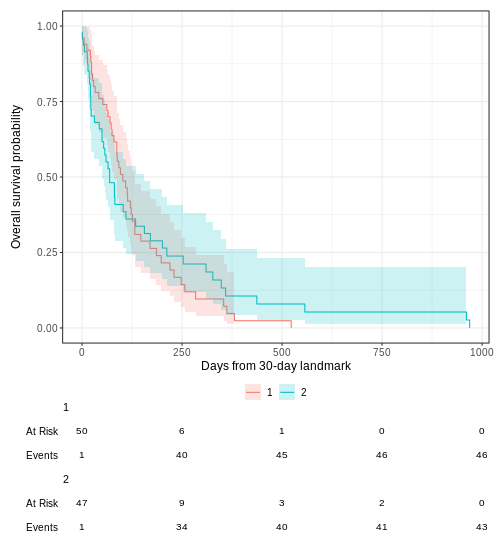

In [ ]:
%%R -h 550 -w 500 -u px
survfit2(Surv(time_from_lm, status) ~trt, data = lm_data) %>%
  ggsurvfit() +
  labs(
    x = "Days from 30-day landmark",
    y = "Overall survival probability"
  ) +
   add_confidence_interval() +
    add_risktable()

### Fit a Cox Proportional Hazards Model

We will now fit a **Cox proportional hazards model** using the landmark dataset, where the covariates of interest are **Karnofsky score (`karno`),** and **treatment type (`trt`)**.

In [ ]:
%%R
# Fit a Cox proportional hazards model for survival from the landmark time
cox_lm<- coxph(Surv(time_from_lm, status) ~ karno + trt,
                      data = lm_data)
# Display the summary of the model
summary(cox_lm)

Call:
coxph(formula = Surv(time_from_lm, status) ~ karno + trt, data = lm_data)

  n= 97, number of events= 89 

           coef exp(coef)  se(coef)      z Pr(>|z|)   
karno -0.019622  0.980570  0.007035 -2.789  0.00529 **
trt    0.118973  1.126339  0.227424  0.523  0.60088   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
karno    0.9806     1.0198    0.9671    0.9942
trt      1.1263     0.8878    0.7212    1.7589

Concordance= 0.612  (se = 0.034 )
Likelihood ratio test= 7.56  on 2 df,   p=0.02
Wald test            = 7.84  on 2 df,   p=0.02
Score (logrank) test = 7.91  on 2 df,   p=0.02



You may use `report()` function of {report} package to get a brief summary of fitted Cox regression model:

In [ ]:
%%R
report::report(cox_lm)

  is probably not reliable.

  is probably not reliable.



We fitted a logistic model to predict Surv(time_from_lm, status) with karno and
trt (formula: Surv(time_from_lm, status) ~ karno + trt). The model's
explanatory power is weak (Nagelkerke's R2 = 0.08).  Within this model:

  - The effect of karno is statistically significant and negative (beta = -0.02,
95% CI [-0.03, -5.83e-03], p = 0.005; Std. beta = -0.33, 95% CI [-0.56, -0.10])
  - The effect of trt is statistically non-significant and positive (beta = 0.12,
95% CI [-0.33, 0.56], p = 0.601; Std. beta = 0.06, 95% CI [-0.16, 0.28])

Standardized parameters were obtained by fitting the model on a standardized
version of the dataset. 95% Confidence Intervals (CIs) and p-values were
computed using a Wald z-distribution approximation.


In [ ]:
%%R
performance(cox_lm)

  is probably not reliable.



# Indices of model performance

AIC     |    AICc |     BIC | Nagelkerke's R2 |  RMSE | Sigma
-------------------------------------------------------------
635.624 | 635.752 | 640.773 |           0.075 | 0.959 | 0.000


#### Plot survival curve

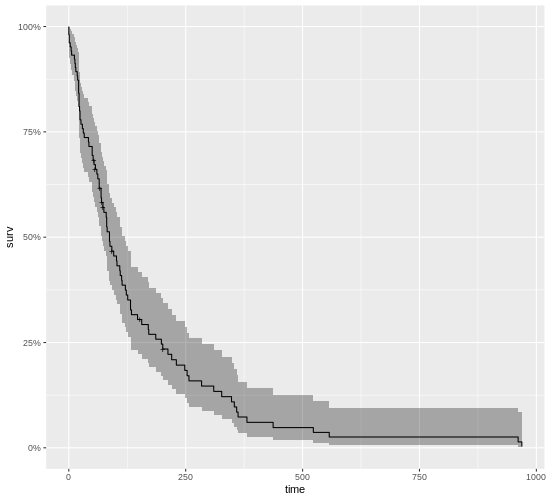

In [ ]:
%%R -h 500 -w 550 -u px

autoplot(survfit(cox_lm))


#### Interpretation

-   **Cox Model Results**:

    -   The **Karnofsky performance score** (`karno`) coefficient might show that patients with a higher score (better health status) at the landmark time have a reduced hazard of death. The `negative coefficient` would suggest that a higher Karnofsky score (better health status) is associated with a lower hazard of death.

    -   The **treatment group** (`trt`) coefficient may show whether the test treatment group has better or worse survival compared to the standard treatment group after the landmark time. Within 30days, the effect is positive but statistically non significant.

-   **Kaplan-Meier Plot**:

    -   The plot will show survival curves for the two treatment groups, indicating which group has a higher probability of survival after 30 days. If the curves diverge, it suggests a difference in treatment effectiveness after the landmark time.


## Summary and Conclusion:

In this example, we used **Landmark analysis** to evaluate the effect of **Karnofsky performance score** and **treatment** on survival after 90 days. This method is helpful when dealing with time-dependent covariates and intermediate events, allowing you to assess how these factors influence survival beyond a certain time point. By focusing on patients still at risk at the landmark time, the analysis can provide more accurate insights into the post-landmark survival.


## References

1.  [Survival Analysis with R](https://rviews.rstudio.com/2017/09/25/survival-analysis-with-r/)

2.  [Cox Proportional-Hazards Model](http://www.sthda.com/english/wiki/cox-proportional-hazards-model)

3.  [Survival Analysis in R](https://www.emilyzabor.com/tutorials/survival_analysis_in_r_tutorial.html)

4.  [Survival Analysis with R](https://bioconnector.github.io/workshops/r-survival.html)
: